In [12]:
import tensorflow.keras as keras
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image as image_utils
from sklearn.model_selection import train_test_split
import math
from google.colab.patches import cv2_imshow
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [2]:
data = pd.read_csv("/content/test.csv")

In [3]:
data

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1576,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1577,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(len(pd.unique(data['character'])))
##yahape dataset ke csv file se character column ke unique values ko hamne print kara

80


In [ ]:
data['character'] = data['character'].replace({'character_01_ka': '0'})
data['character'] = data['character'].replace({'character_02_kha': '1'})
data['character'] = data['character'].replace({'character_03_ga': '2'})
data['character'] = data['character'].replace({'character_04_gha': '3'})
data['character'] = data['character'].replace({'character_05_kna': '4'})
data['character'] = data['character'].replace({'character_06_cha': '5'})
data['character'] = data['character'].replace({'character_07_chha': '6'})
data['character'] = data['character'].replace({'character_08_ja': '7'})
data['character'] = data['character'].replace({'character_09_jha': '8'})
data['character'] = data['character'].replace({'character_10_yna': '9'})
data['character'] = data['character'].replace({'character_11_taamatar': '10'})
data['character'] = data['character'].replace({'character_12_thaa': '11'})
data['character'] = data['character'].replace({'character_13_daa': '12'})
data['character'] = data['character'].replace({'character_14_dhaa': '13'})
data['character'] = data['character'].replace({'character_15_adna': '14'})
data['character'] = data['character'].replace({'character_16_tabala': '15'})
data['character'] = data['character'].replace({'character_17_tha': '16'})
data['character'] = data['character'].replace({'character_18_da': '17'})
data['character'] = data['character'].replace({'character_19_dha': '18'})
data['character'] = data['character'].replace({'character_20_na': '19'})
data['character'] = data['character'].replace({'character_21_pa': '20'})
data['character'] = data['character'].replace({'character_22_pha': '21'})
data['character'] = data['character'].replace({'character_23_ba': '22'})
data['character'] = data['character'].replace({'character_24_bha': '23'})
data['character'] = data['character'].replace({'character_25_ma': '24'})
data['character'] = data['character'].replace({'character_26_yaw': '25'})
data['character'] = data['character'].replace({'character_27_ra': '26'})
data['character'] = data['character'].replace({'character_28_la': '27'})
data['character'] = data['character'].replace({'character_29_waw': '28'})
data['character'] = data['character'].replace({'character_30_motosaw': '29'})
data['character'] = data['character'].replace({'character_31_petchiryakha': '30'})
data['character'] = data['character'].replace({'character_32_patalosaw': '31'})
data['character'] = data['character'].replace({'character_33_ha': '32'})
data['character'] = data['character'].replace({'character_34_chhya': '33'})
data['character'] = data['character'].replace({'character_35_tra': '34'})
data['character'] = data['character'].replace({'character_36_gya': '35'})
data['character'] = data['character'].replace({'digit_0': '35'})
data['character'] = data['character'].replace({'digit_1': '36'})
data['character'] = data['character'].replace({'digit_2': '37'})
data['character'] = data['character'].replace({'digit_3': '38'})
data['character'] = data['character'].replace({'digit_4': '39'})
data['character'] = data['character'].replace({'digit_5': '40'})
data['character'] = data['character'].replace({'digit_6': '41'})
data['character'] = data['character'].replace({'digit_7': '42'})
data['character'] = data['character'].replace({'digit_8': '43'})
data['character'] = data['character'].replace({'digit_9': '44'})

## total 45 classes hai, sabko mene replace kiya manually eith 0 to 44
## this was done cause model is dumb and cant read strings so isliye labels are from 0 to 44, we can do 1-45 too
## rename karneme baad i'lll show you how the csv looks 
## oops wrong code
## character column dekh
## character_01_ka ko 0 se denote kiya

In [ ]:
data.to_csv("replaceddata.csv", index=False) 
## replace karke yahape save kiya

In [ ]:
replaceddata = pd.read_csv("/content/replaceddata.csv")
replaceddata

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,44
91996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,44
91997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,44
91998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,44


In [ ]:
df = pd.read_csv("/content/replaceddata.csv") # avoid header=None. 


## abhi dataset sshamko mene and shamu ne jo split kiya voh 80-20 me split toh hua but 
## 0000 se leke 73k whatever tha voh 80 me gaya and 74k to 92k jo tha voh 20 me gaya
## but we dont want vaise cause fir alphabets thikse split hi nahi hua hai, serially split karna is stupid 
## so mene abhi apne renamed dataset ko yaha shuffle kiya hai
## idk what frac = 1 does lol we'd look into it later

In [ ]:
shuffled_df = df.sample(frac=1)
shuffled_df.to_csv("shufdata.csv", index=False)

In [ ]:
df = pd.read_csv('shufdata.csv')
total_size=len(df)
train_size=math.floor(0.80*total_size)
train=df.head(train_size)
test=df.tail(len(df) - train_size)
train.to_csv('train.csv')
test.to_csv('test.csv')

In [2]:
train = pd.read_csv('/content/newtrain.csv')
test = pd.read_csv('/content/newtest.csv')

In [3]:
train['character'].value_counts()

1     80
51    80
58    80
57    80
56    80
      ..
26    80
25    80
24    80
23    80
79    80
Name: character, Length: 79, dtype: int64

In [4]:
test['character'].value_counts()

1     20
51    20
58    20
57    20
56    20
      ..
26    20
25    20
24    20
23    20
79    20
Name: character, Length: 79, dtype: int64

In [3]:
# # Load in our data from CSV files
train_df = pd.read_csv("/content/newtrain.csv")
#train_df.pop("Unnamed: 0")
valid_df = pd.read_csv("/content/newtest.csv")
#valid_df.pop("Unnamed: 0")

# # Separate out our target values
y_train = train_df['character']
y_valid = valid_df['character']
# print(y_train)
# print(y_valid)
del train_df['character']
del valid_df['character']

# # Separate out our image vectors
x_train = train_df.values
x_valid = valid_df.values

# Turn our scalar targets into binary categories
num_classes = 80
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes) ## one hot encoding model khud karta hai hame khudse karke deneki zaroorat nahi hoti

# Normalize our image data
x_train = x_train / 255
x_valid = x_valid / 255

In [4]:
train_df

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x_train.shape, x_valid.shape

((6320, 1024), (1580, 1024))

In [6]:
print(x_train.shape)

(6320, 1024)


In [7]:
x_train = x_train.reshape(-1,32,32,1)
x_valid = x_valid.reshape(-1,32,32,1)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(64, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(32, 32, 1)))
model.add(Conv2D(64, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(32, 32, 1)))
model.add(Conv2D(64, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(32, 32, 1)))
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(32, 32, 1)))
model.add(Conv2D(64, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(32, 32, 1)))
model.add(Conv2D(64, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(32, 32, 1)))
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(units=4096, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=2048, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=num_classes, activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        3

In [14]:
model.compile(tf.keras.optimizers.Adam(0.00001),loss="categorical_crossentropy", metrics=["accuracy"])

In [15]:
batch_size = 64

In [16]:
model.fit(x_train, y_train, epochs=50,steps_per_epoch=len(x_train)/batch_size, verbose=1, validation_data = (x_valid, y_valid))

Epoch 1/50
98/98 [==============================] - 209s 2s/step - loss: 3.6183 - accuracy: 0.1847 - val_loss: 4.3930 - val_accuracy: 0.0158
Epoch 2/50
98/98 [==============================] - 208s 2s/step - loss: 2.0723 - accuracy: 0.5528 - val_loss: 4.6196 - val_accuracy: 0.0297
Epoch 3/50
98/98 [==============================] - 207s 2s/step - loss: 1.2954 - accuracy: 0.7065 - val_loss: 4.9890 - val_accuracy: 0.0266
Epoch 4/50
98/98 [==============================] - 215s 2s/step - loss: 0.8902 - accuracy: 0.7934 - val_loss: 5.1252 - val_accuracy: 0.0430
Epoch 5/50
98/98 [==============================] - 209s 2s/step - loss: 0.6695 - accuracy: 0.8408 - val_loss: 4.7817 - val_accuracy: 0.0797
Epoch 6/50
98/98 [==============================] - 208s 2s/step - loss: 0.5152 - accuracy: 0.8818 - val_loss: 4.8597 - val_accuracy: 0.1209
Epoch 7/50
98/98 [==============================] - 213s 2s/step - loss: 0.4060 - accuracy: 0.9127 - val_loss: 5.5767 - val_accuracy: 0.1405
Epoch 8/50
98

KeyboardInterrupt: ignored

In [ ]:
predictions = {"0":"Fah",
               "1":"Fii",
               "2":"Fo",
               "3":"Fou",
               "4":"Fu",
               "5":"Fuu",
               "6":"Gaa",
               "7":"Gam",
               "8":"Ge",
               "9":"Gha",
               "10":"Gi",
               "11":"Gii",
               "12":"Nya",
               "13":"Pra"}

## here i am making a dictionary to store the key (basically predictions) and values (alphabets)
## we will then take these and find out put
## for demo i will show you aisehi cause dict is not ready yet

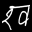

1/1 [==============================] - 0s 44ms/step
kha


1

In [ ]:
def predict_letter(file_path):
    image = mpimg.imread(file_path)
    image = image_utils.load_img(file_path, color_mode="grayscale", target_size=(32,32))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,32,32,1) 
    image = image/255
    i = cv2.imread(file_path)
    cv2_imshow(i)
    prediction = model.predict(image)
    predicted_letter = np.argmax(prediction)
    #print(prediction)

    val_list=list(predictions.values())
    print(val_list[predicted_letter])
    # convert prediction to letter
    #predicted_letter = alphabet[np.argmax(prediction)]
    return predicted_letter


predict_letter ("/content/2771.png")


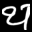

16
tha


In [ ]:
predict_letter ("/content/24561.png")

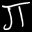

2
ga


In [ ]:
predict_letter ("/content/3739.png")

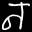

19
na


In [ ]:
predict_letter ("/content/1521.png")

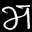

23
bha


In [ ]:
predict_letter ("/content/2185.png")

In [ ]:
predict_letter ("/content/taa.png")

In [ ]:
predict_letter ("/content/ta.jpg")

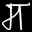

24
ma


In [ ]:
predict_letter ("/content/2286.png")

In [ ]:
z = 30

In [ ]:
val_list=list(predictions.values())
print(val_list)
print(val_list[z])

['ka', 'kha', 'ga', 'gha', 'kna', 'cha', 'chha', 'ja', 'zha', 'yha', 'Ta', 'Tha', 'DAA', 'dhaa', 'adna', 'ta', 'tha', 'da', 'dha', 'na', 'pa', 'pha', 'ba', 'bha', 'ma', 'yaw', 'ra', 'la', 'waw', 'sha', 'half SHAA', 'sa', 'ha', 'chhya', 'tra', 'gya', '0', '1', '2', '3', '5', '6', '7', '8', '9']
half SHAA


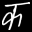

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
a = cv2.imread('/content/1339.png')
cv2_imshow(a)

In [ ]:
a.shape

(32, 32, 3)

In [ ]:
img = a[:,:,0]
img.shape

(32, 32)

In [ ]:
import numpy as np
import pandas as pd
img_r = np.reshape(img, (32*32,1))
img_r.shape


(1024, 1)

In [ ]:
x = np.transpose(img_r)

In [ ]:
x

array([[0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
import pandas as pd 
pd.DataFrame(x).to_csv("/content/dataS.csv")

In [ ]:
Data = pd.read_csv("/content/dataS.csv")
Data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
predictions = {"0":"ka",
               "1":"kha",
               "2":"ga",
               "3":"gha",
               "4":"kna",
               "5":"cha",
               "6":"chha",
               "7":"ja",
               "8":"zha",
               "9":"yha",
               "10":"Ta",
               "11":"Tha",
               "12":"DAA",
               "13":"dhaa",
               "14":"adna",
               "15":"ta",
               "16":"tha",
               "17":"da",
               "18":"dha",
               "19":"na",
               "20":"pa",
               "21":"pha",
               "22":"ba",
               "23":"bha",
               "24":"ma",
               "25":"yaw",
               "26":"ra",
               "27":"la",
               "28":"waw",
               "29":"sha",
               "30":"half SHAA",
               "31":"sa",
               "32":"ha",
               "33":"chhya",
               "34":"tra",
               "35":"gya",
               "36":"0",
               "37":"1",
               "38":"2",
               "39":"3",
               "40":"4",
               "40":"5",
               "41":"6",
               "42":"7",
               "43":"8",
               "44":"9"}

## here i am making a dictionary to store the key (basically predictions) and values (alphabets)
## we will then take these and find out put
## for demo i will show you aisehi cause dict is not ready yet